In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import time

In [2]:
df=pd.read_csv("F:\Work\diease detection\Bangladesh -anam medical college.csv")

In [3]:
df=df.replace('?',np.nan)

In [4]:
data=df[['sg','bgr','sc','hemo','pcv','rbcc','rbc','htn',
         'dm','Label']].copy()

In [5]:
#df1=df.drop(columns=['id','age','bp','sg','al','su','bgr','bu','sc','sod','pot','hemo','pcv','wbcc','rbcc'])

In [6]:
df1=data.drop(columns=['rbc','htn','dm','Label'])

In [7]:
df1

,sg,bgr,sc,hemo,pcv,rbcc
0,1.02,110,3.6,11.95,35.45,4.755
1,1.01,133,3.6,11.95,35.45,4.755
2,1.01,110,3.6,9.35,31.55,4.755
3,1.01,133,3.6,14.55,43.25,4.755
4,1.016,175,3.6,14.55,39.35,5.345
...,...,...,...,...,...,...
195,1.02,175,3.6,9.35,31.55,4.755
196,1.02,133,3.6,8.05,23.75,4.755
197,NaN,110,3.6,15.85,39.35,6.525
198,NaN,133,3.6,14.55,47.15,4.755


In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [9]:
lr=LinearRegression()
imp=IterativeImputer(estimator=lr,verbose=2,max_iter=100, tol=1e-10, imputation_order='roman')

In [10]:
df2=imp.fit_transform(df1)

[IterativeImputer] Completing matrix with shape (200, 6)
[IterativeImputer] Ending imputation round 1/100, elapsed time 0.21
[IterativeImputer] Change: 17.157029390169924, scaled tolerance: 4.27e-08 
[IterativeImputer] Ending imputation round 2/100, elapsed time 0.23
[IterativeImputer] Change: 2.7050332230416316, scaled tolerance: 4.27e-08 
[IterativeImputer] Ending imputation round 3/100, elapsed time 0.23
[IterativeImputer] Change: 1.4368839817627495, scaled tolerance: 4.27e-08 
[IterativeImputer] Ending imputation round 4/100, elapsed time 0.25
[IterativeImputer] Change: 0.7580854705238129, scaled tolerance: 4.27e-08 
[IterativeImputer] Ending imputation round 5/100, elapsed time 0.25
[IterativeImputer] Change: 0.40000743861901267, scaled tolerance: 4.27e-08 
[IterativeImputer] Ending imputation round 6/100, elapsed time 0.27
[IterativeImputer] Change: 0.21112040453876824, scaled tolerance: 4.27e-08 
[IterativeImputer] Ending imputation round 7/100, elapsed time 0.27
[IterativeImput

In [11]:
dl1=pd.DataFrame(df2,columns=('sg','bgr','sc','hemo','pcv','rbcc'))

In [12]:
dl1.head(20)

,sg,bgr,sc,hemo,pcv,rbcc
0,1.020000,110.0,3.600,11.950000,35.450000,4.755
1,1.010000,133.0,3.600,11.950000,35.450000,4.755
2,1.010000,110.0,3.600,9.350000,31.550000,4.755
3,1.010000,133.0,3.600,14.550000,43.250000,4.755
4,1.016000,175.0,3.600,14.550000,39.350000,5.345
5,1.023000,110.0,3.600,13.414756,41.860158,5.345
6,1.020000,110.0,3.600,10.650000,31.550000,3.575
7,1.020000,133.0,3.600,11.950000,39.350000,4.755
8,1.017351,133.0,3.600,14.550000,39.350000,5.345
9,1.010000,110.0,3.600,8.050000,23.750000,4.165


In [13]:
df3=data.drop(columns=['sg','bgr','sc','hemo','pcv','rbcc','Label'])

In [14]:
df3

,rbc,htn,dm
0,0,0,0
1,0,0,0
2,1,0,0
3,0,0,0
4,0,0,1
...,...,...,...
195,0,1,1
196,0,0,1
197,0,0,0
198,0,0,0


In [15]:
x=pd.concat([dl1,df3],axis=1)

In [16]:
x

,sg,bgr,sc,hemo,pcv,rbcc,rbc,htn,dm
0,1.020000,110.0,3.6,11.95,35.45,4.755,0,0,0
1,1.010000,133.0,3.6,11.95,35.45,4.755,0,0,0
2,1.010000,110.0,3.6,9.35,31.55,4.755,1,0,0
3,1.010000,133.0,3.6,14.55,43.25,4.755,0,0,0
4,1.016000,175.0,3.6,14.55,39.35,5.345,0,0,1
...,...,...,...,...,...,...,...,...,...
195,1.020000,175.0,3.6,9.35,31.55,4.755,0,1,1
196,1.020000,133.0,3.6,8.05,23.75,4.755,0,0,1
197,1.019508,110.0,3.6,15.85,39.35,6.525,0,0,0
198,1.017229,133.0,3.6,14.55,47.15,4.755,0,0,0


In [17]:
y=df['Label']

In [18]:
a=pd.concat([x,y],axis=1)

In [19]:
a

,sg,bgr,sc,hemo,pcv,rbcc,rbc,htn,dm,Label
0,1.020000,110.0,3.6,11.95,35.45,4.755,0,0,0,ckd
1,1.010000,133.0,3.6,11.95,35.45,4.755,0,0,0,ckd
2,1.010000,110.0,3.6,9.35,31.55,4.755,1,0,0,ckd
3,1.010000,133.0,3.6,14.55,43.25,4.755,0,0,0,ckd
4,1.016000,175.0,3.6,14.55,39.35,5.345,0,0,1,ckd
...,...,...,...,...,...,...,...,...,...,...
195,1.020000,175.0,3.6,9.35,31.55,4.755,0,1,1,ckd
196,1.020000,133.0,3.6,8.05,23.75,4.755,0,0,1,ckd
197,1.019508,110.0,3.6,15.85,39.35,6.525,0,0,0,notckd
198,1.017229,133.0,3.6,14.55,47.15,4.755,0,0,0,notckd


In [20]:
#a=a.sort_values(['bu'],ascending=False)
#a.reset_index(drop=True,inplace=True)

In [21]:
#a.tail(40)

In [22]:
Label={'notckd':0,'ckd':1}
a['Label']=a['Label'].map(Label)

In [23]:
a.head(20)

,sg,bgr,sc,hemo,pcv,rbcc,rbc,htn,dm,Label
0,1.020000,110.0,3.600,11.950000,35.450000,4.755,0,0,0,1
1,1.010000,133.0,3.600,11.950000,35.450000,4.755,0,0,0,1
2,1.010000,110.0,3.600,9.350000,31.550000,4.755,1,0,0,1
3,1.010000,133.0,3.600,14.550000,43.250000,4.755,0,0,0,1
4,1.016000,175.0,3.600,14.550000,39.350000,5.345,0,0,1,1
5,1.023000,110.0,3.600,13.414756,41.860158,5.345,0,0,0,0
6,1.020000,110.0,3.600,10.650000,31.550000,3.575,0,1,1,1
7,1.020000,133.0,3.600,11.950000,39.350000,4.755,0,0,0,1
8,1.017351,133.0,3.600,14.550000,39.350000,5.345,0,0,0,0
9,1.010000,110.0,3.600,8.050000,23.750000,4.165,0,0,0,1


In [24]:
u=a.iloc[:,:-1]
v=a['Label']

In [25]:
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import SVMSMOTE 

In [26]:
smote=SMOTE()
sm = SVMSMOTE()

In [27]:
x_train_resample,y_train_resample=sm.fit_resample(u,v) 

In [28]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
k=scaler.fit_transform(x_train_resample)

In [29]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(k,y_train_resample,test_size=0.2, random_state=0)

In [30]:
from sklearn.model_selection import KFold
from sklearn.model_selection import ShuffleSplit
fold=ShuffleSplit(n_splits=5, test_size=0.1, random_state=0)
fold1=KFold(5)
from sklearn.model_selection import cross_val_score

In [31]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [32]:
svm=SVC(C=100)
knn=KNeighborsClassifier(n_neighbors=1,weights= 'uniform',metric='manhattan')
gdb=GradientBoostingClassifier(n_estimators=100,max_depth=7,learning_rate=0.1,min_samples_leaf=4)
lgb=LGBMClassifier(n_estimators=100,max_depth=7,learning_rate=0.1,min_child_weight=5)
xgb=XGBClassifier(n_estimators=500,max_depth=5,learning_rate=0.2,min_child_weight=3,eval_metric='error')

In [33]:
labels=['svm','knn','gdb','xgb','lgb']

In [34]:
for clf,label in zip([svm,knn,gdb,xgb,lgb],labels):
    training_start = time.perf_counter()
    results_svm=cross_val_score(clf,x_train,y_train,cv=fold,scoring='accuracy')
    training_end = time.perf_counter()
    train_time = training_end-training_start
    print("Time consumed for training: %4.3f seconds" % (train_time))
    print("%0.4faccuracy with a standard deviation of %0.4f" % (results_svm.mean(), results_svm.std()),label)

Time consumed for training: 0.020 seconds
1.0000accuracy with a standard deviation of 0.0000 svm
Time consumed for training: 0.026 seconds
1.0000accuracy with a standard deviation of 0.0000 knn
Time consumed for training: 1.065 seconds
1.0000accuracy with a standard deviation of 0.0000 gdb


C:\Users\Md.Mustafizur Rahman\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Md.Mustafizur Rahman\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Md.Mustafizur Rahman\anaconda3\lib\site-packages\xgbo

Time consumed for training: 1.501 seconds
0.9905accuracy with a standard deviation of 0.0190 xgb
Time consumed for training: 0.161 seconds
0.9905accuracy with a standard deviation of 0.0190 lgb


In [35]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score 

In [36]:
for clf,label in zip([svm,knn,gdb,xgb,lgb],labels):
    training_start = time.perf_counter()
    clf.fit(x_train,y_train)
    training_end = time.perf_counter()
    train_time = training_end-training_start
    print("Time consumed for training: %4.3f seconds" % (train_time))
    y_pred=clf.predict(x_test)
    print(accuracy_score(y_test,y_pred),label)
    print(confusion_matrix(y_test,y_pred))
    print(precision_score(y_test,y_pred))
    print(recall_score(y_test,y_pred))
    print(f1_score(y_test,y_pred))
    print(roc_auc_score(y_test,y_pred))
        

Time consumed for training: 0.003 seconds
1.0 svm
[[22  0]
 [ 0 30]]
1.0
1.0
1.0
1.0
Time consumed for training: 0.002 seconds
1.0 knn
[[22  0]
 [ 0 30]]
1.0
1.0
1.0
1.0
Time consumed for training: 0.238 seconds
0.9807692307692307 gdb
[[21  1]
 [ 0 30]]
0.967741935483871
1.0
0.9836065573770492
0.9772727272727273


C:\Users\Md.Mustafizur Rahman\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Time consumed for training: 0.271 seconds
0.9615384615384616 xgb
[[20  2]
 [ 0 30]]
0.9375
1.0
0.967741935483871
0.9545454545454545
Time consumed for training: 0.027 seconds
0.9615384615384616 lgb
[[20  2]
 [ 0 30]]
0.9375
1.0
0.967741935483871
0.9545454545454545


In [37]:
from mlxtend.evaluate import combined_ftest_5x2cv

In [46]:
f, p = combined_ftest_5x2cv(estimator1=gdb,
                            estimator2=xgb,
                            X=k, y=y_train_resample,
                            random_seed=1)

C:\Users\Md.Mustafizur Rahman\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Md.Mustafizur Rahman\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Md.Mustafizur Rahman\anaconda3\lib\site-packages\xgbo

In [47]:
print('F statistic: %.3f' % f)
print('p value: %.3f' % p)

F statistic: 1.272
p value: 0.418


In [60]:
features=['pcv','hemo']

TypeError: The x variable is categorical, but one of ['numeric', 'datetime'] is required

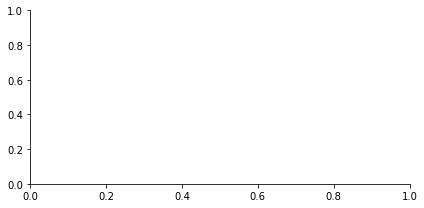

In [64]:
grid=sns.FacetGrid(df, hue="Label",aspect=2)
grid.map(sns.kdeplot, 'pcv')
grid.add_legend()